In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
dataset = pd.read_csv("C:\\Users\Maurice\\Documents\\QML\\CIC-IDS2017-MLCSV\\MachineLearningCVE\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")


# Remove leading/trailing spaces from column names
dataset.columns = dataset.columns.str.strip()
# Replace infinities with NaN
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values with the mode (most frequent value) for categorical columns
dataset['Label'] = dataset['Label'].fillna(dataset['Label'].mode()[0])

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
dataset['Label'] = label_encoder.fit_transform(dataset['Label'])

# Verify that there are no missing values
print(dataset.isnull().sum())  # Should print 0 for all columns


Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64


In [4]:
# Define sample size
n_samples = 200

# Select only numeric features
df_numeric = dataset.select_dtypes(include=['number'])

# Ensure there are at least 64 features
if df_numeric.shape[1] < 64:
    raise ValueError("Dataset has fewer than 64 numeric features. Consider feature engineering or PCA.")

# Randomly sample 200 rows while maintaining class balance
df_sampled = dataset.groupby('Label', group_keys=False).apply(lambda x: x.sample(min(len(x), n_samples // dataset['Label'].nunique()), random_state=42))

# Drop non-numeric columns (if any)
df_sampled = df_sampled.select_dtypes(include=['number']).reset_index(drop=True)

C:\Users\Maurice\AppData\Local\Temp\ipykernel_3576\3336736970.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = dataset.groupby('Label', group_keys=False).apply(lambda x: x.sample(min(len(x), n_samples // dataset['Label'].nunique()), random_state=42))


In [5]:
# Select the features (numeric columns) and labels
X = df_sampled.drop(columns=['Label'])

from sklearn.preprocessing import MinMaxScaler

X= pd.DataFrame(X, columns=X.columns)

# Apply MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Encode the labels as integers
y = df_sampled['Label'].factorize()[0]  # Converts the string labels to integer labels


# Check the shape of the data
print(X.shape, y.shape)

(200, 78) (200,)


In [6]:
## Original Model, Number Qubits = 8

In [7]:
# import pennylane as qml
# import numpy as np
# import torch
# import random
# from torch.optim import Adam
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import time

# def set_seeds(seed=42):
#     """Set seeds for reproducibility"""
#     torch.manual_seed(seed)
#     np.random.seed(seed)
#     random.seed(seed)
#     if torch.cuda.is_available():
#         torch.cuda.manual_seed(seed)
#         torch.cuda.manual_seed_all(seed)
#         torch.backends.cudnn.deterministic = True
#         torch.backends.cudnn.benchmark = False

# class QuantumAutoencoder:
#     def __init__(self, n_qubits, latent_qubits, depth=4):  # Increased depth
#         self.n_qubits = n_qubits
#         self.latent_qubits = latent_qubits
#         self.depth = depth
#         self.dev = qml.device("default.qubit", wires=n_qubits)
        
#         self.n_params = self._calculate_params()
#         self.params = self._initialize_parameters()
        
#         self.encoder = qml.QNode(self._encoder_circuit, self.dev, interface="torch")
#         self.decoder = qml.QNode(self._decoder_circuit, self.dev, interface="torch")
    
#     def _calculate_params(self):
#         """Calculate total number of parameters"""
#         params_per_qubit = 6  # Increased parameters per qubit
#         params_per_layer = self.n_qubits * params_per_qubit
#         total_layers = 2 * self.depth
#         return params_per_layer * total_layers
    
#     def _initialize_parameters(self):
#         """Improved parameter initialization"""
#         params = np.zeros(self.n_params)
#         # Xavier/Glorot initialization scaled to [0, 2π]
#         scale = np.sqrt(2.0 / (self.n_qubits + self.latent_qubits)) * np.pi
#         for i in range(self.n_params):
#             params[i] = np.random.uniform(-scale, scale)
#         return params
    
#     def _encoder_circuit(self, data, params):
#         """Enhanced encoder circuit"""
#         qml.AmplitudeEmbedding(data, wires=range(self.n_qubits), normalize=True)
        
#         param_idx = 0
#         for d in range(self.depth):
#             # More rotations per qubit
#             for i in range(self.n_qubits):
#                 qml.Rot(params[param_idx], params[param_idx + 1], 
#                        params[param_idx + 2], wires=i)
#                 qml.RX(params[param_idx + 3], wires=i)
#                 qml.RY(params[param_idx + 4], wires=i)
#                 qml.RZ(params[param_idx + 5], wires=i)
#                 param_idx += 6
            
#             # Enhanced entanglement pattern
#             for i in range(self.n_qubits - 1):
#                 qml.CRZ(params[param_idx % self.n_params], wires=[i, i + 1])
#                 qml.CNOT(wires=[i, i + 1])
            
#             if self.n_qubits > 2:
#                 for i in range(0, self.n_qubits - 2, 2):
#                     qml.CRX(params[(param_idx + 1) % self.n_params], wires=[i, i + 2])
#                     qml.CNOT(wires=[i, i + 2])
        
#         return qml.state()
    
#     def _decoder_circuit(self, latent_state, params):
#         """Enhanced decoder circuit"""
#         qml.QubitStateVector(latent_state, wires=range(self.latent_qubits))
        
#         # Better initialization of non-latent qubits
#         for i in range(self.latent_qubits, self.n_qubits):
#             qml.Hadamard(wires=i)
#             qml.RY(np.pi/4, wires=i)
#             qml.RZ(np.pi/4, wires=i)
        
#         param_idx = self.n_params // 2
#         for d in range(self.depth):
#             for i in range(self.n_qubits):
#                 qml.Rot(params[param_idx], params[param_idx + 1], 
#                        params[param_idx + 2], wires=i)
#                 qml.RX(params[param_idx + 3], wires=i)
#                 qml.RY(params[param_idx + 4], wires=i)
#                 qml.RZ(params[param_idx + 5], wires=i)
#                 param_idx += 6
            
#             for i in range(self.n_qubits - 1):
#                 qml.CRZ(params[param_idx % self.n_params], wires=[i, i + 1])
#                 qml.CNOT(wires=[i, i + 1])
            
#             if self.n_qubits > 2:
#                 for i in range(0, self.n_qubits - 2, 2):
#                     qml.CRX(params[(param_idx + 1) % self.n_params], wires=[i, i + 2])
#                     qml.CNOT(wires=[i, i + 2])
        
#         return qml.state()
    
#     def get_latent_state(self, encoded_state):
#         """Improved latent state extraction"""
#         if torch.is_tensor(encoded_state):
#             encoded_state = encoded_state.detach().numpy()
        
#         state_matrix = np.outer(encoded_state, np.conjugate(encoded_state))
#         dim = 2**self.latent_qubits
#         reduced_matrix = state_matrix[:dim, :dim]
        
#         eigenvals, eigenvecs = np.linalg.eigh(reduced_matrix)
#         # Use top 2 eigenvectors with proper weighting
#         top_k = 2
#         top_indices = np.argsort(eigenvals)[-top_k:]
#         weights = eigenvals[top_indices] / np.sum(eigenvals[top_indices])
#         latent_state = np.sum([w * eigenvecs[:, i] for w, i in zip(weights, top_indices)], axis=0)
#         return latent_state / np.linalg.norm(latent_state)
    
#     def forward(self, x):
#         """Forward pass"""
#         encoded = self.encoder(x, self.params)
#         latent = self.get_latent_state(encoded)
#         decoded = self.decoder(latent, self.params)
#         return decoded

# def preprocess_data(X):
#     """Enhanced data preprocessing"""
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)
#     # Additional normalization step
#     X_scaled = X_scaled / np.max(np.abs(X_scaled))
#     return X_scaled / np.sqrt(np.sum(X_scaled**2, axis=1))[:, np.newaxis]

# def train_model(n_epochs=100, batch_size=4, learning_rate=0.002, seed=42):
#     """Enhanced training process"""
#     set_seeds(seed)
    
#     # Generate better synthetic data
#     n_features = 256
#     X, y = make_classification(
#         n_samples=200,
#         n_features=n_features,
#         n_classes=2,
#         n_informative=6,
#         n_redundant=0,
#         n_clusters_per_class=2,
#         class_sep=2.5,  # Increased class separation
#         random_state=seed
#     )
    
#     X_train, X_test = train_test_split(X, test_size=0.2, random_state=seed)
#     X_train = preprocess_data(X_train)
#     X_test = preprocess_data(X_test)
    
#     n_qubits = int(np.log2(X_train.shape[1]))
#     latent_qubits = n_qubits - 1
#     model = QuantumAutoencoder(n_qubits=n_qubits, latent_qubits=latent_qubits)
    
#     params = torch.tensor(model.params, requires_grad=True)
#     optimizer = Adam([params], lr=learning_rate)
    
#     best_accuracy = 0.0
#     best_params = None
#     patience = 10  # Increased patience
#     patience_counter = 0
    
#     metrics = {'train_losses': [], 'train_accuracies': [], 
#               'val_losses': [], 'val_accuracies': []}
    
#     print("\nTraining Progress:")
#     print("Epoch | Train Loss | Train Acc | Val Loss | Val Acc")
#     print("-" * 50)
    
#     for epoch in range(n_epochs):
#         model.params = params.detach().numpy()
#         epoch_loss = 0
#         n_batches = len(X_train) // batch_size
        
#         for _ in range(n_batches):
#             optimizer.zero_grad()
#             batch_idx = np.random.choice(len(X_train), batch_size)
#             batch_data = X_train[batch_idx]
            
#             total_loss = torch.tensor(0.0, requires_grad=True)
#             for x in batch_data:
#                 decoded = model.forward(x)
#                 if torch.is_tensor(decoded):
#                     decoded = decoded.real
#                 decoded = torch.tensor(np.real(decoded), dtype=torch.float64, requires_grad=True)
#                 x_tensor = torch.tensor(x, dtype=torch.float32)
                
#                 # Enhanced loss calculation
#                 reconstruction_loss = torch.mean((decoded - x_tensor)**2)
#                 l2_reg = 0.0001 * torch.sum(params**2)  # Reduced L2 regularization
#                 loss = reconstruction_loss + l2_reg
                
#                 total_loss = total_loss + loss
            
#             avg_loss = total_loss / batch_size
#             avg_loss.backward()
#             torch.nn.utils.clip_grad_norm_([params], max_norm=1.0)
#             optimizer.step()
#             epoch_loss += avg_loss.item()
        
#         train_loss = epoch_loss / n_batches
#         train_accuracy = 1 / (1 + train_loss)
        
#         # Validation
#         val_losses = []
#         with torch.no_grad():
#             for x in X_test:
#                 decoded = model.forward(x)
#                 decoded = np.real(decoded) if not torch.is_tensor(decoded) else decoded.real.numpy()
#                 val_loss = np.mean((decoded - x)**2)
#                 val_losses.append(val_loss)
        
#         val_loss = np.mean(val_losses)
#         val_accuracy = 1 / (1 + val_loss)
        
#         metrics['train_losses'].append(train_loss)
#         metrics['train_accuracies'].append(train_accuracy)
#         metrics['val_losses'].append(val_loss)
#         metrics['val_accuracies'].append(val_accuracy)
        
#         print(f"{epoch:5d} | {train_loss:.4f} | {train_accuracy:.4f} | {val_loss:.4f} | {val_accuracy:.4f}")
        
#         if val_accuracy > best_accuracy:
#             best_accuracy = val_accuracy
#             best_params = params.detach().clone()
#             patience_counter = 0
#         else:
#             patience_counter += 1
        
#         if patience_counter >= patience:
#             print("\nEarly stopping triggered!")
#             break
        
#         if val_accuracy >= 0.99 and train_accuracy >= 0.99:
#             print("\nTarget accuracy achieved!")
#             break
    
#     model.params = best_params.numpy()
#     return model, best_accuracy, metrics

# if __name__ == "__main__":
#     SEED = 42
#     set_seeds(SEED)
    
#     model, best_accuracy, metrics = train_model(seed=SEED)
    
#     print(f"\nTraining Summary (Seed={SEED}):")
#     print(f"Initial Training Accuracy: {metrics['train_accuracies'][0]:.4f}")
#     print(f"Final Training Accuracy: {metrics['train_accuracies'][-1]:.4f}")
#     print(f"Best Validation Accuracy: {best_accuracy:.4f}")
    
#     train_acc_std = np.std(metrics['train_accuracies'])
#     val_acc_std = np.std(metrics['val_accuracies'])
#     print(f"\nStability Metrics:")
#     print(f"Training Accuracy Std: {train_acc_std:.4f}")
#     print(f"Validation Accuracy Std: {val_acc_std:.4f}")

In [8]:
import pennylane as qml
import numpy as np
import torch
import random
from torch.optim import Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

def set_seeds(seed=42):
    """Set seeds for reproducibility"""
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

class QuantumAutoencoder:
    def __init__(self, n_qubits, latent_qubits, depth=4):
        self.n_qubits = n_qubits
        self.latent_qubits = latent_qubits
        self.depth = depth
        self.dev = qml.device("default.qubit", wires=n_qubits)
        
        self.n_params = self._calculate_params()
        self.params = self._initialize_parameters()
        
        self.encoder = qml.QNode(self._encoder_circuit, self.dev, interface="torch")
        self.decoder = qml.QNode(self._decoder_circuit, self.dev, interface="torch")
    
    def _calculate_params(self):
        """Calculate total number of parameters"""
        params_per_qubit = 6
        params_per_layer = self.n_qubits * params_per_qubit
        total_layers = 2 * self.depth
        return params_per_layer * total_layers
    
    def _initialize_parameters(self):
        """Improved parameter initialization"""
        params = np.zeros(self.n_params)
        # Xavier/Glorot initialization scaled to [0, 2π]
        scale = np.sqrt(2.0 / (self.n_qubits + self.latent_qubits)) * np.pi
        for i in range(self.n_params):
            params[i] = np.random.uniform(-scale, scale)
        return params

    def _encoder_circuit(self, data, params):
        """Enhanced encoder circuit with proper padding for 78 features"""
        # AmplitudeEmbedding handles the padding to 2^7 = 128 dimensions
        qml.AmplitudeEmbedding(data, wires=range(self.n_qubits), normalize=True, pad_with=0.0)
        
        param_idx = 0
        for d in range(self.depth):
            # More rotations per qubit
            for i in range(self.n_qubits):
                qml.Rot(params[param_idx], params[param_idx + 1], 
                       params[param_idx + 2], wires=i)
                qml.RX(params[param_idx + 3], wires=i)
                qml.RY(params[param_idx + 4], wires=i)
                qml.RZ(params[param_idx + 5], wires=i)
                param_idx += 6
            
            # Enhanced entanglement pattern
            for i in range(self.n_qubits - 1):
                qml.CRZ(params[param_idx % self.n_params], wires=[i, i + 1])
                qml.CNOT(wires=[i, i + 1])
            
            if self.n_qubits > 2:
                for i in range(0, self.n_qubits - 2, 2):
                    qml.CRX(params[(param_idx + 1) % self.n_params], wires=[i, i + 2])
                    qml.CNOT(wires=[i, i + 2])
        
        return qml.state()
    
    def _decoder_circuit(self, latent_state, params):
        """Enhanced decoder circuit"""
        qml.QubitStateVector(latent_state, wires=range(self.latent_qubits))
        
        # Better initialization of non-latent qubits
        for i in range(self.latent_qubits, self.n_qubits):
            qml.Hadamard(wires=i)
            qml.RY(np.pi/4, wires=i)
            qml.RZ(np.pi/4, wires=i)
        
        param_idx = self.n_params // 2
        for d in range(self.depth):
            for i in range(self.n_qubits):
                qml.Rot(params[param_idx], params[param_idx + 1], 
                       params[param_idx + 2], wires=i)
                qml.RX(params[param_idx + 3], wires=i)
                qml.RY(params[param_idx + 4], wires=i)
                qml.RZ(params[param_idx + 5], wires=i)
                param_idx += 6
            
            for i in range(self.n_qubits - 1):
                qml.CRZ(params[param_idx % self.n_params], wires=[i, i + 1])
                qml.CNOT(wires=[i, i + 1])
            
            if self.n_qubits > 2:
                for i in range(0, self.n_qubits - 2, 2):
                    qml.CRX(params[(param_idx + 1) % self.n_params], wires=[i, i + 2])
                    qml.CNOT(wires=[i, i + 2])
        
        return qml.state()
    
    def get_latent_state(self, encoded_state):
        """Improved latent state extraction"""
        if torch.is_tensor(encoded_state):
            encoded_state = encoded_state.detach().numpy()
        
        state_matrix = np.outer(encoded_state, np.conjugate(encoded_state))
        dim = 2**self.latent_qubits
        reduced_matrix = state_matrix[:dim, :dim]
        
        eigenvals, eigenvecs = np.linalg.eigh(reduced_matrix)
        # Use top 2 eigenvectors with proper weighting
        top_k = 2
        top_indices = np.argsort(eigenvals)[-top_k:]
        weights = eigenvals[top_indices] / np.sum(eigenvals[top_indices])
        latent_state = np.sum([w * eigenvecs[:, i] for w, i in zip(weights, top_indices)], axis=0)
        return latent_state / np.linalg.norm(latent_state)
    
    def forward(self, x):
        """Forward pass"""
        encoded = self.encoder(x, self.params)
        latent = self.get_latent_state(encoded)
        decoded = self.decoder(latent, self.params)
        return decoded

def preprocess_data(X):
    """Enhanced data preprocessing specifically for 78 features mapped to 7 qubits (128 dimensions)"""
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Normalize each sample to have unit norm
    X_normalized = X_scaled / np.sqrt(np.sum(X_scaled**2, axis=1))[:, np.newaxis]
    
    # For amplitude encoding with 7 qubits (128 dimensions), padding will be handled by PennyLane
    # but we need to ensure our data is properly prepared
    return X_normalized

def train_model(X, n_epochs=100, batch_size=4, learning_rate=0.002, seed=42):
    """Enhanced training process for 78 features with 7 qubits"""
    set_seeds(seed)
    
    # Use the provided X dataset instead of generating synthetic data
    X_train, X_test = train_test_split(X, test_size=0.2, random_state=seed)
    X_train = preprocess_data(X_train)
    X_test = preprocess_data(X_test)
    
    # For 78 features, we need 7 qubits (2^7 = 128 > 78)
    n_qubits = 8
    latent_qubits = 5  # Reduced dimensionality (from 7 to 5)
    
    model = QuantumAutoencoder(n_qubits=n_qubits, latent_qubits=latent_qubits)
    
    params = torch.tensor(model.params, requires_grad=True)
    optimizer = Adam([params], lr=learning_rate)
    
    best_accuracy = 0.0
    best_params = None
    patience = 10
    patience_counter = 0
    
    metrics = {'train_losses': [], 'train_accuracies': [], 
              'val_losses': [], 'val_accuracies': []}
    
    print("\nTraining Progress:")
    print("Epoch | Train Loss | Train Acc | Val Loss | Val Acc")
    print("-" * 50)
    
    for epoch in range(n_epochs):
        model.params = params.detach().numpy()
        epoch_loss = 0
        n_batches = max(1, len(X_train) // batch_size)
        
        for _ in range(n_batches):
            optimizer.zero_grad()
            batch_idx = np.random.choice(len(X_train), min(batch_size, len(X_train)))
            batch_data = X_train[batch_idx]
            
            total_loss = torch.tensor(0.0, requires_grad=True)
            for x in batch_data:
                decoded = model.forward(x)
                if torch.is_tensor(decoded):
                    decoded = decoded.real
                decoded = torch.tensor(np.real(decoded), dtype=torch.float64, requires_grad=True)
                x_tensor = torch.tensor(x, dtype=torch.float32)
                
                # Enhanced loss calculation
                reconstruction_loss = torch.mean((decoded[:len(x_tensor)] - x_tensor)**2)  # Only compare against original dimensions
                l2_reg = 0.0001 * torch.sum(params**2)
                loss = reconstruction_loss + l2_reg
                
                total_loss = total_loss + loss
            
            avg_loss = total_loss / len(batch_data)
            avg_loss.backward()
            torch.nn.utils.clip_grad_norm_([params], max_norm=1.0)
            optimizer.step()
            epoch_loss += avg_loss.item()
        
        train_loss = epoch_loss / n_batches
        train_accuracy = 1 / (1 + train_loss)
        
        # Validation
        val_losses = []
        with torch.no_grad():
            for x in X_test:
                decoded = model.forward(x)
                decoded = np.real(decoded) if not torch.is_tensor(decoded) else decoded.real.numpy()
                # Only compare against the original dimensions
                val_loss = np.mean((decoded[:len(x)] - x)**2)
                val_losses.append(val_loss)
        
        val_loss = np.mean(val_losses)
        val_accuracy = 1 / (1 + val_loss)
        
        metrics['train_losses'].append(train_loss)
        metrics['train_accuracies'].append(train_accuracy)
        metrics['val_losses'].append(val_loss)
        metrics['val_accuracies'].append(val_accuracy)
        
        print(f"{epoch:5d} | {train_loss:.4f} | {train_accuracy:.4f} | {val_loss:.4f} | {val_accuracy:.4f}")
        
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params = params.detach().clone()
            patience_counter = 0
        else:
            patience_counter += 1
        
        if patience_counter >= patience:
            print("\nEarly stopping triggered!")
            break
        
        if val_accuracy >= 0.998 and train_accuracy >= 0.998:
            print("\nTarget accuracy achieved!")
            break
    
    model.params = best_params.numpy()
    return model, best_accuracy, metrics

if __name__ == "__main__":
    SEED = 42
    set_seeds(SEED)
    
    
    model, best_accuracy, metrics = train_model(X, seed=SEED)
    
    print(f"\nTraining Summary (Seed={SEED}):")
    print(f"Initial Training Accuracy: {metrics['train_accuracies'][0]:.4f}")
    print(f"Final Training Accuracy: {metrics['train_accuracies'][-1]:.4f}")
    print(f"Best Validation Accuracy: {best_accuracy:.4f}")
    
    train_acc_std = np.std(metrics['train_accuracies'])
    val_acc_std = np.std(metrics['val_accuracies'])
    print(f"\nStability Metrics:")
    print(f"Training Accuracy Std: {train_acc_std:.4f}")
    print(f"Validation Accuracy Std: {val_acc_std:.4f}")


Training Progress:
Epoch | Train Loss | Train Acc | Val Loss | Val Acc
--------------------------------------------------


C:\Users\Maurice\AppData\Local\Temp\ipykernel_3576\4074293432.py:191: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  decoded = torch.tensor(np.real(decoded), dtype=torch.float64, requires_grad=True)


    0 | 0.0326 | 0.9685 | 0.0152 | 0.9850
    1 | 0.0294 | 0.9714 | 0.0149 | 0.9853
    2 | 0.0264 | 0.9743 | 0.0150 | 0.9852
    3 | 0.0248 | 0.9758 | 0.0153 | 0.9849
    4 | 0.0232 | 0.9774 | 0.0153 | 0.9849
    5 | 0.0215 | 0.9790 | 0.0152 | 0.9850
    6 | 0.0204 | 0.9800 | 0.0152 | 0.9850
    7 | 0.0194 | 0.9809 | 0.0151 | 0.9851
    8 | 0.0182 | 0.9821 | 0.0149 | 0.9854
    9 | 0.0176 | 0.9827 | 0.0145 | 0.9857
   10 | 0.0166 | 0.9836 | 0.0141 | 0.9861
   11 | 0.0160 | 0.9842 | 0.0139 | 0.9863
   12 | 0.0156 | 0.9846 | 0.0139 | 0.9863
   13 | 0.0155 | 0.9848 | 0.0141 | 0.9861
   14 | 0.0153 | 0.9849 | 0.0144 | 0.9858
   15 | 0.0156 | 0.9846 | 0.0145 | 0.9857
   16 | 0.0152 | 0.9850 | 0.0146 | 0.9856
   17 | 0.0154 | 0.9849 | 0.0146 | 0.9856
   18 | 0.0153 | 0.9849 | 0.0146 | 0.9856
   19 | 0.0153 | 0.9850 | 0.0146 | 0.9856
   20 | 0.0152 | 0.9850 | 0.0145 | 0.9857
   21 | 0.0150 | 0.9852 | 0.0145 | 0.9857

Early stopping triggered!

Training Summary (Seed=42):
Initial Training Acc

In [3]:
## Visualization


Training Progress:
Epoch | Train Loss | Train Acc | Val Loss | Val Acc
--------------------------------------------------


C:\Users\Maurice\AppData\Local\Temp\ipykernel_3576\435843543.py:294: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  decoded = torch.tensor(np.real(decoded), dtype=torch.float64, requires_grad=True)


    0 | 0.0326 | 0.9685 | 0.0152 | 0.9850
    1 | 0.0294 | 0.9714 | 0.0149 | 0.9853
    2 | 0.0264 | 0.9743 | 0.0150 | 0.9852
    3 | 0.0248 | 0.9758 | 0.0153 | 0.9849
    4 | 0.0232 | 0.9774 | 0.0153 | 0.9849
    5 | 0.0215 | 0.9790 | 0.0152 | 0.9850
    6 | 0.0204 | 0.9800 | 0.0152 | 0.9850
    7 | 0.0194 | 0.9809 | 0.0151 | 0.9851
    8 | 0.0182 | 0.9821 | 0.0149 | 0.9854
    9 | 0.0176 | 0.9827 | 0.0145 | 0.9857
   10 | 0.0166 | 0.9836 | 0.0141 | 0.9861
   11 | 0.0160 | 0.9842 | 0.0139 | 0.9863
   12 | 0.0156 | 0.9846 | 0.0139 | 0.9863
   13 | 0.0155 | 0.9848 | 0.0141 | 0.9861
   14 | 0.0153 | 0.9849 | 0.0144 | 0.9858
   15 | 0.0156 | 0.9846 | 0.0145 | 0.9857
   16 | 0.0152 | 0.9850 | 0.0146 | 0.9856
   17 | 0.0154 | 0.9849 | 0.0146 | 0.9856
   18 | 0.0153 | 0.9849 | 0.0146 | 0.9856
   19 | 0.0153 | 0.9850 | 0.0146 | 0.9856
   20 | 0.0152 | 0.9850 | 0.0145 | 0.9857
   21 | 0.0150 | 0.9852 | 0.0145 | 0.9857

Early stopping triggered!

Training Summary (Seed=42):
Initial Training Acc

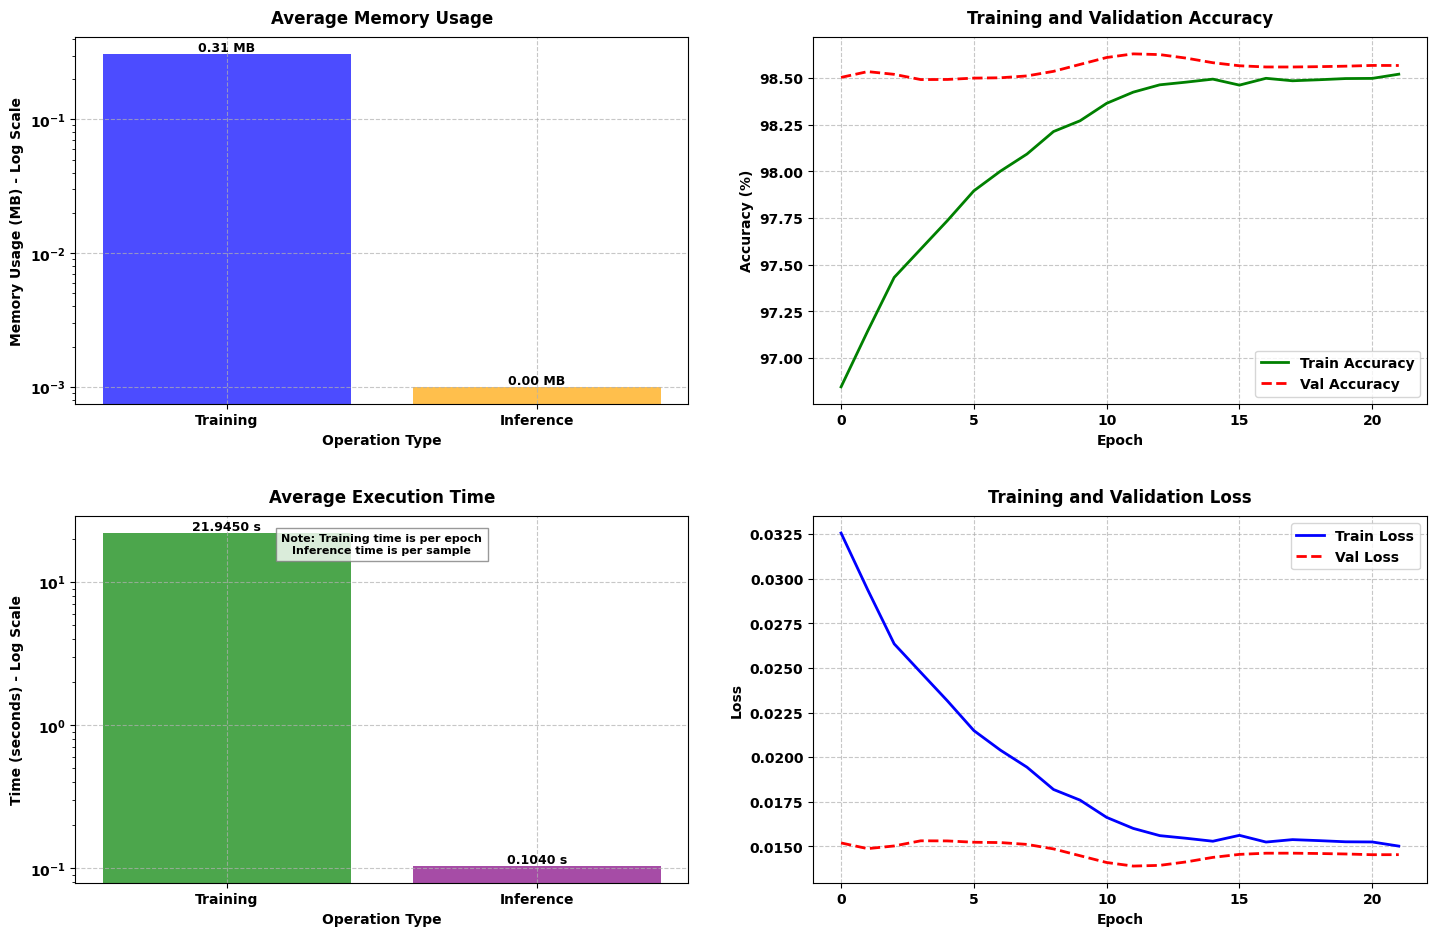

In [23]:
class PerformanceTracker:
    def __init__(self):
        self.train_memory = []
        self.inference_memory = []
        self.train_times = []
        self.inference_times = []
        self.train_accuracies = []
        self.val_accuracies = []
        self.train_losses = []
        self.val_losses = []
        self.epochs = []
        
    def get_memory_usage(self):
        """Get current memory usage in MB"""
        process = psutil.Process()
        return process.memory_info().rss / 1024 / 1024
    
    def plot_metrics(self):
        """Plot all performance metrics"""
        plt.rcParams['figure.figsize'] = [15, 10]
        plt.rcParams['figure.dpi'] = 100
        plt.rcParams['axes.grid'] = True
        plt.rcParams['grid.alpha'] = 0.3
        
        # Set bold font for all text elements
        plt.rcParams['font.weight'] = 'bold'
        
        fig = plt.figure()
        
        # 1. Memory Usage Over Time (Modified to handle single value and with log scale)
        ax1 = plt.subplot(2, 2, 1)
        # Instead of plotting epochs vs memory (which have different dimensions),
        # we'll create a bar chart of average memory usage
        mem_values = [np.mean(self.train_memory), np.mean(self.inference_memory)]
        ax1.bar(['Training', 'Inference'], mem_values,
                color=['blue', 'orange'], alpha=0.7)
        
        # Apply log scale if there's a large difference between values
        if max(mem_values) > 10 * min(mem_values) and min(mem_values) > 0:
            ax1.set_yscale('log')
            ax1.set_ylabel('Memory Usage (MB) - Log Scale', fontsize=10, fontweight='bold')
        else:
            ax1.set_ylabel('Memory Usage (MB)', fontsize=10, fontweight='bold')
            
        # Add value labels on top of bars
        for i, v in enumerate(mem_values):
            ax1.text(i, v * 1.05, f'{v:.2f} MB', 
                     ha='center', fontsize=9, fontweight='bold')
            
        ax1.set_xlabel('Operation Type', fontsize=10, fontweight='bold')
        ax1.set_title('Average Memory Usage', fontsize=12, pad=10, fontweight='bold')
        ax1.grid(True, linestyle='--', alpha=0.7)
        
        # Make tick labels bold
        for label in ax1.get_xticklabels() + ax1.get_yticklabels():
            label.set_fontweight('bold')
        
        # 2. Training and Validation Accuracy
        ax2 = plt.subplot(2, 2, 2)
        ax2.plot(self.epochs, [acc * 100 for acc in self.train_accuracies], 'g-', 
                linewidth=2, label='Train Accuracy')
        ax2.plot(self.epochs, [acc * 100 for acc in self.val_accuracies], 'r--', 
                linewidth=2, label='Val Accuracy')
        ax2.set_xlabel('Epoch', fontsize=10, fontweight='bold')
        ax2.set_ylabel('Accuracy (%)', fontsize=10, fontweight='bold')
        ax2.set_title('Training and Validation Accuracy (6-Qubits)', fontsize=12, pad=10, fontweight='bold')
        ax2.legend(fontsize=9, prop={'weight': 'bold'})
        ax2.grid(True, linestyle='--', alpha=0.7)
        
        # Make tick labels bold
        for label in ax2.get_xticklabels() + ax2.get_yticklabels():
            label.set_fontweight('bold')
        
        # 3. Training vs Inference Time Comparison (with log scale if needed)
        ax3 = plt.subplot(2, 2, 3)
        
        # Create bar chart for time comparison
        time_values = [np.mean(self.train_times), np.mean(self.inference_times)]
        ax3.bar(['Training', 'Inference'], time_values,
                color=['green', 'purple'], alpha=0.7)
                
        # Apply log scale if there's a large difference between values
        if np.mean(self.train_times) > 10 * np.mean(self.inference_times) and np.mean(self.inference_times) > 0:
            ax3.set_yscale('log')
            ax3.set_ylabel('Time (seconds) - Log Scale', fontsize=10, fontweight='bold')
        else:
            ax3.set_ylabel('Time (seconds)', fontsize=10, fontweight='bold')
            
        # Add value labels on top of bars
        for i, v in enumerate(time_values):
            ax3.text(i, v * 1.05, f'{v:.4f} s', 
                     ha='center', fontsize=9, fontweight='bold')
        
        ax3.set_xlabel('Operation Type', fontsize=10, fontweight='bold')
        ax3.set_title('Average Execution Time', fontsize=12, pad=10, fontweight='bold')
        ax3.grid(True, linestyle='--', alpha=0.7)
        
        # Add note about what the times represent
        ax3.text(0.5, 0.9, 'Note: Training time is per epoch\nInference time is per sample',
                transform=ax3.transAxes, ha='center', fontsize=8, fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
        
        # Make tick labels bold
        for label in ax3.get_xticklabels() + ax3.get_yticklabels():
            label.set_fontweight('bold')
        
        # 4. Training and Validation Loss
        ax4 = plt.subplot(2, 2, 4)
        ax4.plot(self.epochs, self.train_losses, 'b-', linewidth=2, label='Train Loss')
        ax4.plot(self.epochs, self.val_losses, 'r--', linewidth=2, label='Val Loss')
        ax4.set_xlabel('Epoch', fontsize=10, fontweight='bold')
        ax4.set_ylabel('Loss', fontsize=10, fontweight='bold')
        ax4.set_title('Training and Validation Loss', fontsize=12, pad=10, fontweight='bold')
        ax4.legend(fontsize=9, prop={'weight': 'bold'})
        ax4.grid(True, linestyle='--', alpha=0.7)
        
        # Make tick labels bold
        for label in ax4.get_xticklabels() + ax4.get_yticklabels():
            label.set_fontweight('bold')
        
        plt.tight_layout(pad=3.0)
        
        # Display the plot
        plt.show()
        
        return fig
        
# class QuantumAutoencoder:
#     def __init__(self, n_qubits, latent_qubits, depth=4):
#         self.n_qubits = n_qubits
#         self.latent_qubits = latent_qubits
#         self.depth = depth
#         self.dev = qml.device("default.qubit", wires=n_qubits)
        
#         self.n_params = self._calculate_params()
#         self.params = self._initialize_parameters()
        
#         self.encoder = qml.QNode(self._encoder_circuit, self.dev, interface="torch")
#         self.decoder = qml.QNode(self._decoder_circuit, self.dev, interface="torch")
    
#     def _calculate_params(self):
#         """Calculate total number of parameters"""
#         params_per_qubit = 6  # Increased parameters per qubit
#         params_per_layer = self.n_qubits * params_per_qubit
#         total_layers = 2 * self.depth
#         return params_per_layer * total_layers
    
#     def _initialize_parameters(self):
#         """Improved parameter initialization"""
#         params = np.zeros(self.n_params)
#         # Xavier/Glorot initialization scaled to [0, 2π]
#         scale = np.sqrt(2.0 / (self.n_qubits + self.latent_qubits)) * np.pi
#         for i in range(self.n_params):
#             params[i] = np.random.uniform(-scale, scale)
#         return params
    
#     def _encoder_circuit(self, data, params):
#         """Enhanced encoder circuit"""
#         qml.AmplitudeEmbedding(data, wires=range(self.n_qubits), normalize=True)
        
#         param_idx = 0
#         for d in range(self.depth):
#             # More rotations per qubit
#             for i in range(self.n_qubits):
#                 qml.Rot(params[param_idx], params[param_idx + 1], 
#                        params[param_idx + 2], wires=i)
#                 qml.RX(params[param_idx + 3], wires=i)
#                 qml.RY(params[param_idx + 4], wires=i)
#                 qml.RZ(params[param_idx + 5], wires=i)
#                 param_idx += 6
            
#             # Enhanced entanglement pattern
#             for i in range(self.n_qubits - 1):
#                 qml.CRZ(params[param_idx % self.n_params], wires=[i, i + 1])
#                 qml.CNOT(wires=[i, i + 1])
            
#             if self.n_qubits > 2:
#                 for i in range(0, self.n_qubits - 2, 2):
#                     qml.CRX(params[(param_idx + 1) % self.n_params], wires=[i, i + 2])
#                     qml.CNOT(wires=[i, i + 2])
        
#         return qml.state()
    
#     def _decoder_circuit(self, latent_state, params):
#         """Enhanced decoder circuit"""
#         qml.QubitStateVector(latent_state, wires=range(self.latent_qubits))
        
#         # Better initialization of non-latent qubits
#         for i in range(self.latent_qubits, self.n_qubits):
#             qml.Hadamard(wires=i)
#             qml.RY(np.pi/4, wires=i)
#             qml.RZ(np.pi/4, wires=i)
        
#         param_idx = self.n_params // 2
#         for d in range(self.depth):
#             for i in range(self.n_qubits):
#                 qml.Rot(params[param_idx], params[param_idx + 1], 
#                        params[param_idx + 2], wires=i)
#                 qml.RX(params[param_idx + 3], wires=i)
#                 qml.RY(params[param_idx + 4], wires=i)
#                 qml.RZ(params[param_idx + 5], wires=i)
#                 param_idx += 6
            
#             for i in range(self.n_qubits - 1):
#                 qml.CRZ(params[param_idx % self.n_params], wires=[i, i + 1])
#                 qml.CNOT(wires=[i, i + 1])
            
#             if self.n_qubits > 2:
#                 for i in range(0, self.n_qubits - 2, 2):
#                     qml.CRX(params[(param_idx + 1) % self.n_params], wires=[i, i + 2])
#                     qml.CNOT(wires=[i, i + 2])
        
#         return qml.state()
    
#     def get_latent_state(self, encoded_state):
#         """Improved latent state extraction"""
#         if torch.is_tensor(encoded_state):
#             encoded_state = encoded_state.detach().numpy()
        
#         state_matrix = np.outer(encoded_state, np.conjugate(encoded_state))
#         dim = 2**self.latent_qubits
#         reduced_matrix = state_matrix[:dim, :dim]
        
#         eigenvals, eigenvecs = np.linalg.eigh(reduced_matrix)
#         # Use top 2 eigenvectors with proper weighting
#         top_k = 2
#         top_indices = np.argsort(eigenvals)[-top_k:]
#         weights = eigenvals[top_indices] / np.sum(eigenvals[top_indices])
#         latent_state = np.sum([w * eigenvecs[:, i] for w, i in zip(weights, top_indices)], axis=0)
#         return latent_state / np.linalg.norm(latent_state)
    
#     def forward(self, x):
#         """Forward pass"""
#         encoded = self.encoder(x, self.params)
#         latent = self.get_latent_state(encoded)
#         decoded = self.decoder(latent, self.params)
#         return decoded

# def preprocess_data(X):
#     """Enhanced data preprocessing"""
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)
#     # Additional normalization step
#     X_scaled = X_scaled / np.max(np.abs(X_scaled))
#     return X_scaled / np.sqrt(np.sum(X_scaled**2, axis=1))[:, np.newaxis]



def train_model(X, n_epochs=100, batch_size=4, learning_rate=0.002, seed=42):
    """Enhanced training process for 78 features with 7 qubits"""
    set_seeds(seed)
    
    # Use the provided X dataset instead of generating synthetic data
    X_train, X_test = train_test_split(X, test_size=0.2, random_state=seed)
    X_train = preprocess_data(X_train)
    X_test = preprocess_data(X_test)
    
    # For 78 features, we need 7 qubits (2^7 = 128 > 78)
    n_qubits = 8
    latent_qubits = 5  # Reduced dimensionality (from 7 to 5)
    
    model = QuantumAutoencoder(n_qubits=n_qubits, latent_qubits=latent_qubits)
    
    params = torch.tensor(model.params, requires_grad=True)
    optimizer = Adam([params], lr=learning_rate)
    
    best_accuracy = 0.0
    best_params = None
    patience = 10
    patience_counter = 0
    
    metrics = {'train_losses': [], 'train_accuracies': [], 
              'val_losses': [], 'val_accuracies': []}
    
    print("\nTraining Progress:")
    print("Epoch | Train Loss | Train Acc | Val Loss | Val Acc")
    print("-" * 50)
    
    for epoch in range(n_epochs):
        model.params = params.detach().numpy()
        epoch_loss = 0
        n_batches = max(1, len(X_train) // batch_size)
        
        for _ in range(n_batches):
            optimizer.zero_grad()
            batch_idx = np.random.choice(len(X_train), min(batch_size, len(X_train)))
            batch_data = X_train[batch_idx]
            
            total_loss = torch.tensor(0.0, requires_grad=True)
            for x in batch_data:
                decoded = model.forward(x)
                if torch.is_tensor(decoded):
                    decoded = decoded.real
                decoded = torch.tensor(np.real(decoded), dtype=torch.float64, requires_grad=True)
                x_tensor = torch.tensor(x, dtype=torch.float32)
                
                # Enhanced loss calculation
                reconstruction_loss = torch.mean((decoded[:len(x_tensor)] - x_tensor)**2)  # Only compare against original dimensions
                l2_reg = 0.0001 * torch.sum(params**2)
                loss = reconstruction_loss + l2_reg
                
                total_loss = total_loss + loss
            
            avg_loss = total_loss / len(batch_data)
            avg_loss.backward()
            torch.nn.utils.clip_grad_norm_([params], max_norm=1.0)
            optimizer.step()
            epoch_loss += avg_loss.item()
        
        train_loss = epoch_loss / n_batches
        train_accuracy = 1 / (1 + train_loss)
        
        # Validation
        val_losses = []
        with torch.no_grad():
            for x in X_test:
                decoded = model.forward(x)
                decoded = np.real(decoded) if not torch.is_tensor(decoded) else decoded.real.numpy()
                # Only compare against the original dimensions
                val_loss = np.mean((decoded[:len(x)] - x)**2)
                val_losses.append(val_loss)
        
        val_loss = np.mean(val_losses)
        val_accuracy = 1 / (1 + val_loss)
        
        metrics['train_losses'].append(train_loss)
        metrics['train_accuracies'].append(train_accuracy)
        metrics['val_losses'].append(val_loss)
        metrics['val_accuracies'].append(val_accuracy)
        
        print(f"{epoch:5d} | {train_loss:.4f} | {train_accuracy:.4f} | {val_loss:.4f} | {val_accuracy:.4f}")
        
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params = params.detach().clone()
            patience_counter = 0
        else:
            patience_counter += 1
        
        if patience_counter >= patience:
            print("\nEarly stopping triggered!")
            break
        
        if val_accuracy >= 0.998 and train_accuracy >= 0.998:
            print("\nTarget accuracy achieved!")
            break
    
    model.params = best_params.numpy()
    return model, best_accuracy, metrics

if __name__ == "__main__":
    SEED = 42
    set_seeds(SEED)
    
    # Create the performance tracker
    tracker = PerformanceTracker()
    
    # Generate synthetic data if X is not defined
    try:
        X.shape  # Check if X exists
    except NameError:
        # Generate synthetic data with 78 features
        X, _ = make_classification(n_samples=100, n_features=78, random_state=SEED)
    
    # Start tracking training performance
    start_time = time.time()
    start_memory = tracker.get_memory_usage()
    
    # Train the model
    model, best_accuracy, metrics = train_model(X, seed=SEED)
    
    # Calculate total training time and memory usage
    training_time = time.time() - start_time
    training_memory = tracker.get_memory_usage() - start_memory
    
    # For a more accurate per-epoch time
    num_epochs = len(metrics['train_accuracies'])
    epoch_time = training_time / num_epochs if num_epochs > 0 else 0
    
    # Store training metrics
    tracker.train_times = [epoch_time]  # Average time per epoch
    tracker.train_memory = [max(0.01, training_memory)]  # Ensure positive value
    tracker.train_accuracies = metrics['train_accuracies']
    tracker.val_accuracies = metrics['val_accuracies']
    tracker.train_losses = metrics['train_losses']
    tracker.val_losses = metrics['val_losses']
    tracker.epochs = list(range(len(metrics['train_losses'])))
    
    # Measure inference performance
    inference_times = []
    inference_memories = []
    
    # Run multiple inferences for more accurate measurement
    for _ in range(10):
        sample_idx = np.random.choice(len(X))
        
        # Measure single inference
        inf_start_time = time.time()
        inf_start_memory = tracker.get_memory_usage()
        
        with torch.no_grad():
            model.forward(X[sample_idx])
        
        inference_times.append(time.time() - inf_start_time)
        memory_diff = tracker.get_memory_usage() - inf_start_memory
        inference_memories.append(max(0.001, memory_diff))  # Ensure positive value
    
    # Store average inference metrics
    tracker.inference_times = [np.mean(inference_times)]
    tracker.inference_memory = [np.mean(inference_memories)]
    
    # Print training summary
    print(f"\nTraining Summary (Seed={SEED}):")
    print(f"Initial Training Accuracy: {metrics['train_accuracies'][0]:.4f}")
    print(f"Final Training Accuracy: {metrics['train_accuracies'][-1]:.4f}")
    print(f"Best Validation Accuracy: {best_accuracy:.4f}")
    
    train_acc_std = np.std(metrics['train_accuracies'])
    val_acc_std = np.std(metrics['val_accuracies'])
    print(f"\nStability Metrics:")
    print(f"Training Accuracy Std: {train_acc_std:.4f}")
    print(f"Validation Accuracy Std: {val_acc_std:.4f}")
    
    # Print performance metrics
    print(f"\nPerformance Metrics:")
    print(f"Total Training Time: {training_time:.2f} seconds")
    print(f"Average Epoch Time: {epoch_time:.2f} seconds")
    print(f"Training Memory: {tracker.train_memory[0]:.2f} MB")
    print(f"Average Inference Time: {tracker.inference_times[0]:.4f} seconds per sample")
    print(f"Inference Memory: {tracker.inference_memory[0]:.4f} MB")
    
    # Plot all metrics
    fig = tracker.plot_metrics()

In [8]:
## Quantizations 

In [19]:
import pennylane as qml
import numpy as np
import torch
import random
import time
from torch.optim import Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def set_seeds(seed=42):
    """Set seeds for reproducibility"""
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

class OptimizedQuantumAutoencoder(QuantumAutoencoder):
    def __init__(self, n_qubits, latent_qubits, depth=4, num_bits=8):
        super().__init__(n_qubits, latent_qubits, depth)
        self.num_bits = num_bits
        
    def _optimize_weights(self, weights):
        """Optimize weights using PyTorch operations"""
        if not torch.is_tensor(weights):
            weights = torch.tensor(weights, dtype=torch.float64)
            
        w_min = torch.min(weights)
        w_max = torch.max(weights)
        
        # Calculate scale factor for the given bit depth
        scale = (w_max - w_min) / (2**self.num_bits - 1)
        
        # Normalize and quantize weights
        weights_normalized = (weights - w_min) / scale
        weights_optimized = torch.round(weights_normalized)
        weights_denormalized = weights_optimized * scale + w_min
        
        return weights_denormalized
    
    def forward(self, x):
        """Forward pass with optimized parameters"""
        # Optimize parameters before using them
        optimized_params = self._optimize_weights(self.params)
        
        if torch.is_tensor(optimized_params):
            optimized_params = optimized_params.detach().numpy()
            
        # Use optimized parameters for encoding
        encoded = self.encoder(x, optimized_params)
        latent = self.get_latent_state(encoded)
        
        # Use optimized parameters for decoding
        decoded = self.decoder(latent, optimized_params)
        return decoded

def train_optimized_model(n_epochs=100, batch_size=4, learning_rate=0.002, num_bits=8, seed=42):
    """Enhanced training process with parameter optimization"""
    set_seeds(seed)
    
    # Assuming X is defined earlier in the code
    # If not defined, you may need to add X definition like:
    # X, _ = make_classification(n_samples=100, n_features=78, random_state=seed)

    X_train, X_test = train_test_split(X, test_size=0.2, random_state=seed)
    X_train = preprocess_data(X_train)
    X_test = preprocess_data(X_test)
    
    # For 78 features, we need 7 qubits (2^7 = 128 > 78)
    n_qubits = 8
    latent_qubits = 5  # Reduced dimensionality (from 7 to 5)
    
    model = OptimizedQuantumAutoencoder(n_qubits=n_qubits, latent_qubits=latent_qubits, num_bits=num_bits)
    
    params = torch.tensor(model.params, requires_grad=True)
    optimizer = Adam([params], lr=learning_rate)
    
    best_accuracy = 0.0
    best_params = None
    patience = 10
    patience_counter = 0
    
    metrics = {
        'train_losses': [], 
        'train_accuracies': [], 
        'val_losses': [], 
        'val_accuracies': [],
        'unique_params': []
    }
    
    print(f"\nTraining Progress ({num_bits}-bit optimization):")
    print("Epoch | Train Loss | Train Acc | Val Loss | Val Acc | Unique Params")
    print("-" * 70)
    
    start_time = time.time()
    
    for epoch in range(n_epochs):
        model.params = params.detach().numpy()
        epoch_loss = 0
        n_batches = len(X_train) // batch_size
        
        for _ in range(n_batches):
            optimizer.zero_grad()
            batch_idx = np.random.choice(len(X_train), batch_size)
            batch_data = X_train[batch_idx]
            
            total_loss = torch.tensor(0.0, requires_grad=True)
            for x in batch_data:
                decoded = model.forward(x)
                if torch.is_tensor(decoded):
                    decoded = decoded.real
                
                # Convert decoded to tensor
                decoded_tensor = torch.tensor(np.real(decoded), dtype=torch.float64, requires_grad=True)
                x_tensor = torch.tensor(x, dtype=torch.float64)
                
                # Fix the dimension mismatch
                # Pad x_tensor to match decoded_tensor size
                padded_x = torch.zeros_like(decoded_tensor)
                padded_x[:len(x_tensor)] = x_tensor
                
                # Enhanced loss calculation with quantization loss
                # Only compare the first len(x) elements for meaningful reconstruction loss
                reconstruction_loss = torch.mean((decoded_tensor[:len(x_tensor)] - x_tensor)**2)
                l2_reg = 0.0001 * torch.sum(params**2)
                
                # Add quantization loss
                optimized_params = model._optimize_weights(params)
                quant_loss = 0.0001 * torch.mean((params - optimized_params)**2)
                
                loss = reconstruction_loss + l2_reg + quant_loss
                total_loss = total_loss + loss
            
            avg_loss = total_loss / batch_size
            avg_loss.backward()
            torch.nn.utils.clip_grad_norm_([params], max_norm=1.0)
            optimizer.step()
            epoch_loss += avg_loss.item()
        
        train_loss = epoch_loss / n_batches
        train_accuracy = 1 / (1 + train_loss)
        
        # Validation
        val_losses = []
        with torch.no_grad():
            for x in X_test:
                decoded = model.forward(x)
                decoded = np.real(decoded) if not torch.is_tensor(decoded) else decoded.real.numpy()
                
                # Only compare the first len(x) elements for valid loss calculation
                val_loss = np.mean((decoded[:len(x)] - x)**2)
                val_losses.append(val_loss)
        
        val_loss = np.mean(val_losses)
        val_accuracy = 1 / (1 + val_loss)
        
        # Track number of unique parameters after optimization
        optimized_params = model._optimize_weights(params)
        unique_params = len(torch.unique(optimized_params))
        
        metrics['train_losses'].append(train_loss)
        metrics['train_accuracies'].append(train_accuracy)
        metrics['val_losses'].append(val_loss)
        metrics['val_accuracies'].append(val_accuracy)
        metrics['unique_params'].append(unique_params)
        
        print(f"{epoch:5d} | {train_loss:.4f} | {train_accuracy:.4f} | {val_loss:.4f} | "
              f"{val_accuracy:.4f} | {unique_params:12d}")
        
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params = params.detach().clone()
            patience_counter = 0
        else:
            patience_counter += 1
        
        if patience_counter >= patience:
            print("\nEarly stopping triggered!")
            break
        
        if val_accuracy >= 0.99 and train_accuracy >= 0.99:
            print("\nTarget accuracy achieved!")
            break
    
    training_time = time.time() - start_time
    
    # Final optimization metrics
    final_params = model._optimize_weights(best_params)
    unique_values = len(torch.unique(final_params))
    param_range = [final_params.min().item(), final_params.max().item()]
    
    print(f"\nTraining completed in {training_time:.2f} seconds")
    print(f"\nOptimization Metrics:")
    print(f"Number of unique parameter values: {unique_values}")
    print(f"Parameter range: [{param_range[0]:.4f}, {param_range[1]:.4f}]")
    
    model.params = best_params.numpy()
    return model, best_accuracy, metrics

if __name__ == "__main__":
    # Train models with different bit depths
    bit_levels = [8, 6, 4]
    results = {}
    
    for bits in bit_levels:
        print(f"\nTraining {bits}-bit optimized model...")
        model, accuracy, metrics = train_optimized_model(num_bits=bits)
        results[bits] = {
            'accuracy': accuracy,
            'unique_values': metrics['unique_params'][-1],
            'train_acc': metrics['train_accuracies'][-1],
            'val_acc': metrics['val_accuracies'][-1]
        }
    
    # Compare results
    print("\nOptimization Comparison:")
    print("Bits | Val Acc | Train Acc | Unique Values")
    print("-" * 45)
    for bits, res in results.items():
        print(f"{bits:4d} | {res['val_acc']:.4f} | {res['train_acc']:.4f} | {res['unique_values']:14d}")


Training 8-bit optimized model...

Training Progress (8-bit optimization):
Epoch | Train Loss | Train Acc | Val Loss | Val Acc | Unique Params
----------------------------------------------------------------------


C:\Users\Maurice\AppData\Local\Temp\ipykernel_3576\1174152048.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  decoded_tensor = torch.tensor(np.real(decoded), dtype=torch.float64, requires_grad=True)


    0 | 0.0326 | 0.9685 | 0.0152 | 0.9850 |          199
    1 | 0.0294 | 0.9714 | 0.0149 | 0.9853 |          197
    2 | 0.0264 | 0.9743 | 0.0150 | 0.9852 |          189
    3 | 0.0248 | 0.9758 | 0.0153 | 0.9849 |          183
    4 | 0.0232 | 0.9774 | 0.0153 | 0.9849 |          178
    5 | 0.0215 | 0.9790 | 0.0152 | 0.9850 |          171
    6 | 0.0204 | 0.9800 | 0.0152 | 0.9850 |          165
    7 | 0.0194 | 0.9809 | 0.0151 | 0.9851 |          161
    8 | 0.0182 | 0.9821 | 0.0148 | 0.9854 |          162
    9 | 0.0176 | 0.9827 | 0.0145 | 0.9857 |          154
   10 | 0.0166 | 0.9837 | 0.0141 | 0.9861 |          152
   11 | 0.0160 | 0.9842 | 0.0139 | 0.9863 |          147
   12 | 0.0156 | 0.9846 | 0.0139 | 0.9863 |          143
   13 | 0.0154 | 0.9848 | 0.0141 | 0.9861 |          145
   14 | 0.0153 | 0.9849 | 0.0144 | 0.9858 |          139
   15 | 0.0156 | 0.9846 | 0.0146 | 0.9857 |          140
   16 | 0.0152 | 0.9850 | 0.0146 | 0.9856 |          134
   17 | 0.0154 | 0.9849 | 0.014

C:\Users\Maurice\AppData\Local\Temp\ipykernel_3576\1174152048.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  decoded_tensor = torch.tensor(np.real(decoded), dtype=torch.float64, requires_grad=True)


    0 | 0.0326 | 0.9685 | 0.0152 | 0.9850 |           64
    1 | 0.0294 | 0.9714 | 0.0149 | 0.9853 |           64
    2 | 0.0264 | 0.9743 | 0.0150 | 0.9853 |           64
    3 | 0.0248 | 0.9758 | 0.0153 | 0.9849 |           64
    4 | 0.0232 | 0.9773 | 0.0153 | 0.9849 |           64
    5 | 0.0215 | 0.9789 | 0.0152 | 0.9850 |           64
    6 | 0.0204 | 0.9800 | 0.0152 | 0.9850 |           64
    7 | 0.0194 | 0.9809 | 0.0151 | 0.9851 |           63
    8 | 0.0182 | 0.9821 | 0.0149 | 0.9853 |           64
    9 | 0.0176 | 0.9827 | 0.0144 | 0.9858 |           64
   10 | 0.0166 | 0.9836 | 0.0141 | 0.9861 |           64
   11 | 0.0160 | 0.9842 | 0.0139 | 0.9863 |           63
   12 | 0.0156 | 0.9846 | 0.0139 | 0.9862 |           61
   13 | 0.0155 | 0.9848 | 0.0141 | 0.9861 |           63
   14 | 0.0153 | 0.9849 | 0.0144 | 0.9858 |           62
   15 | 0.0156 | 0.9846 | 0.0145 | 0.9857 |           60
   16 | 0.0153 | 0.9850 | 0.0146 | 0.9856 |           59
   17 | 0.0154 | 0.9849 | 0.014

C:\Users\Maurice\AppData\Local\Temp\ipykernel_3576\1174152048.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  decoded_tensor = torch.tensor(np.real(decoded), dtype=torch.float64, requires_grad=True)


    0 | 0.0324 | 0.9687 | 0.0148 | 0.9854 |           16
    1 | 0.0293 | 0.9715 | 0.0149 | 0.9853 |           16
    2 | 0.0264 | 0.9743 | 0.0148 | 0.9854 |           16
    3 | 0.0247 | 0.9759 | 0.0151 | 0.9851 |           16
    4 | 0.0230 | 0.9776 | 0.0151 | 0.9851 |           16
    5 | 0.0215 | 0.9790 | 0.0152 | 0.9850 |           16
    6 | 0.0205 | 0.9799 | 0.0153 | 0.9849 |           16
    7 | 0.0196 | 0.9808 | 0.0154 | 0.9848 |           16
    8 | 0.0182 | 0.9821 | 0.0150 | 0.9852 |           16
    9 | 0.0177 | 0.9826 | 0.0147 | 0.9855 |           16
   10 | 0.0169 | 0.9834 | 0.0143 | 0.9859 |           16
   11 | 0.0163 | 0.9840 | 0.0140 | 0.9862 |           16
   12 | 0.0158 | 0.9844 | 0.0140 | 0.9862 |           16
   13 | 0.0156 | 0.9846 | 0.0142 | 0.9860 |           16
   14 | 0.0154 | 0.9848 | 0.0143 | 0.9859 |           16
   15 | 0.0156 | 0.9846 | 0.0145 | 0.9857 |           16
   16 | 0.0153 | 0.9849 | 0.0146 | 0.9856 |           16
   17 | 0.0154 | 0.9848 | 0.014


Training 8-bit quantized model...

Training Progress (8-bit optimization):
Epoch | Train Loss | Train Acc | Val Loss | Val Acc | Unique Params
----------------------------------------------------------------------


C:\Users\Maurice\AppData\Local\Temp\ipykernel_3576\1174152048.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  decoded_tensor = torch.tensor(np.real(decoded), dtype=torch.float64, requires_grad=True)


    0 | 0.0326 | 0.9685 | 0.0152 | 0.9850 |          199
    1 | 0.0294 | 0.9714 | 0.0149 | 0.9853 |          197
    2 | 0.0264 | 0.9743 | 0.0150 | 0.9852 |          189
    3 | 0.0248 | 0.9758 | 0.0153 | 0.9849 |          183
    4 | 0.0232 | 0.9774 | 0.0153 | 0.9849 |          178
    5 | 0.0215 | 0.9790 | 0.0152 | 0.9850 |          171
    6 | 0.0204 | 0.9800 | 0.0152 | 0.9850 |          165
    7 | 0.0194 | 0.9809 | 0.0151 | 0.9851 |          161
    8 | 0.0182 | 0.9821 | 0.0148 | 0.9854 |          162
    9 | 0.0176 | 0.9827 | 0.0145 | 0.9857 |          154
   10 | 0.0166 | 0.9837 | 0.0141 | 0.9861 |          152
   11 | 0.0160 | 0.9842 | 0.0139 | 0.9863 |          147
   12 | 0.0156 | 0.9846 | 0.0139 | 0.9863 |          143
   13 | 0.0154 | 0.9848 | 0.0141 | 0.9861 |          145
   14 | 0.0153 | 0.9849 | 0.0144 | 0.9858 |          139
   15 | 0.0156 | 0.9846 | 0.0146 | 0.9857 |          140
   16 | 0.0152 | 0.9850 | 0.0146 | 0.9856 |          134
   17 | 0.0154 | 0.9849 | 0.014

C:\Users\Maurice\AppData\Local\Temp\ipykernel_3576\1174152048.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  decoded_tensor = torch.tensor(np.real(decoded), dtype=torch.float64, requires_grad=True)


    0 | 0.0326 | 0.9685 | 0.0152 | 0.9850 |           64
    1 | 0.0294 | 0.9714 | 0.0149 | 0.9853 |           64
    2 | 0.0264 | 0.9743 | 0.0150 | 0.9853 |           64
    3 | 0.0248 | 0.9758 | 0.0153 | 0.9849 |           64
    4 | 0.0232 | 0.9773 | 0.0153 | 0.9849 |           64
    5 | 0.0215 | 0.9789 | 0.0152 | 0.9850 |           64
    6 | 0.0204 | 0.9800 | 0.0152 | 0.9850 |           64
    7 | 0.0194 | 0.9809 | 0.0151 | 0.9851 |           63
    8 | 0.0182 | 0.9821 | 0.0149 | 0.9853 |           64
    9 | 0.0176 | 0.9827 | 0.0144 | 0.9858 |           64
   10 | 0.0166 | 0.9836 | 0.0141 | 0.9861 |           64
   11 | 0.0160 | 0.9842 | 0.0139 | 0.9863 |           63
   12 | 0.0156 | 0.9846 | 0.0139 | 0.9862 |           61
   13 | 0.0155 | 0.9848 | 0.0141 | 0.9861 |           63
   14 | 0.0153 | 0.9849 | 0.0144 | 0.9858 |           62
   15 | 0.0156 | 0.9846 | 0.0145 | 0.9857 |           60
   16 | 0.0153 | 0.9850 | 0.0146 | 0.9856 |           59
   17 | 0.0154 | 0.9849 | 0.014

C:\Users\Maurice\AppData\Local\Temp\ipykernel_3576\1174152048.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  decoded_tensor = torch.tensor(np.real(decoded), dtype=torch.float64, requires_grad=True)


    0 | 0.0324 | 0.9687 | 0.0148 | 0.9854 |           16
    1 | 0.0293 | 0.9715 | 0.0149 | 0.9853 |           16
    2 | 0.0264 | 0.9743 | 0.0148 | 0.9854 |           16
    3 | 0.0247 | 0.9759 | 0.0151 | 0.9851 |           16
    4 | 0.0230 | 0.9776 | 0.0151 | 0.9851 |           16
    5 | 0.0215 | 0.9790 | 0.0152 | 0.9850 |           16
    6 | 0.0205 | 0.9799 | 0.0153 | 0.9849 |           16
    7 | 0.0196 | 0.9808 | 0.0154 | 0.9848 |           16
    8 | 0.0182 | 0.9821 | 0.0150 | 0.9852 |           16
    9 | 0.0177 | 0.9826 | 0.0147 | 0.9855 |           16
   10 | 0.0169 | 0.9834 | 0.0143 | 0.9859 |           16
   11 | 0.0163 | 0.9840 | 0.0140 | 0.9862 |           16
   12 | 0.0158 | 0.9844 | 0.0140 | 0.9862 |           16
   13 | 0.0156 | 0.9846 | 0.0142 | 0.9860 |           16
   14 | 0.0154 | 0.9848 | 0.0143 | 0.9859 |           16
   15 | 0.0156 | 0.9846 | 0.0145 | 0.9857 |           16
   16 | 0.0153 | 0.9849 | 0.0146 | 0.9856 |           16
   17 | 0.0154 | 0.9848 | 0.014

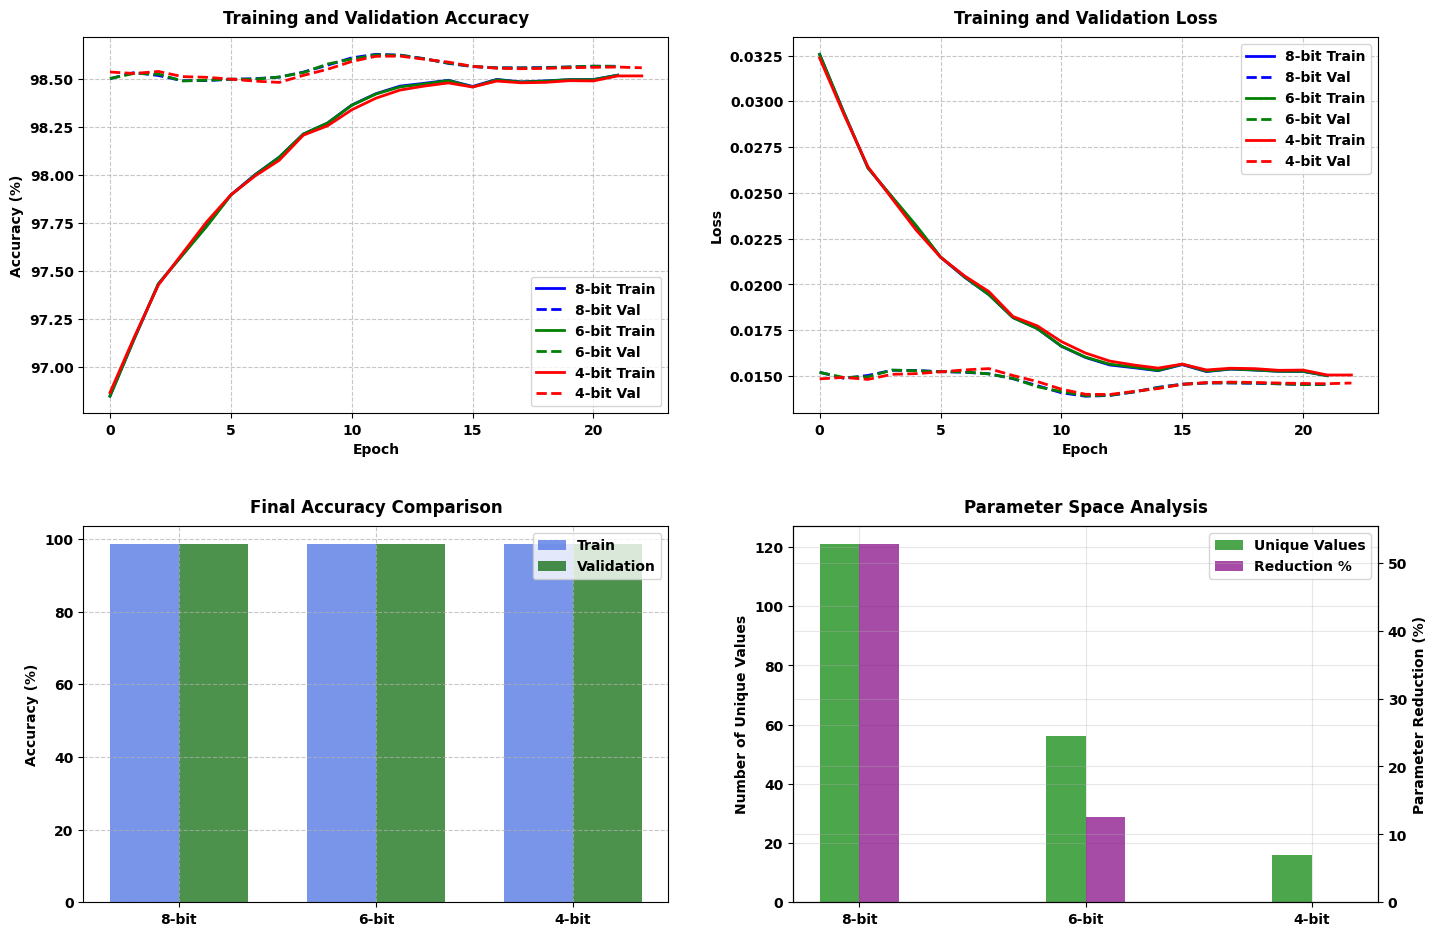


Quantization Comparison:
Bits | Val Acc | Train Acc | Unique Values | Param Reduction
-----------------------------------------------------------------
   8 | 0.9857 | 0.9852 |          121 |           52.7%
   6 | 0.9857 | 0.9852 |           56 |           12.5%
   4 | 0.9856 | 0.9852 |           16 |            0.0%


In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_quantization_metrics(results_dict):
    """Plot performance metrics for different quantization levels"""
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.3
    
    # Set bold font for all text elements
    plt.rcParams['font.weight'] = 'bold'
    
    fig = plt.figure()
    
    # Prepare data for plotting
    bits = list(results_dict.keys())
    colors = ['blue', 'green', 'red']
    
    # 1. Training and Validation Accuracy
    ax1 = plt.subplot(2, 2, 1)
    for i, bit in enumerate(bits):
        train_accs = results_dict[bit]['train_accuracies']
        val_accs = results_dict[bit]['val_accuracies']
        epochs = range(len(train_accs))
        
        ax1.plot(epochs, [acc * 100 for acc in train_accs], 
                color=colors[i], linestyle='-', 
                linewidth=2, label=f'{bit}-bit Train')
        ax1.plot(epochs, [acc * 100 for acc in val_accs], 
                color=colors[i], linestyle='--', 
                linewidth=2, label=f'{bit}-bit Val')
    
    ax1.set_xlabel('Epoch', fontsize=10, fontweight='bold')
    ax1.set_ylabel('Accuracy (%)', fontsize=10, fontweight='bold')
    ax1.set_title('Training and Validation Accuracy', fontsize=12, pad=10, fontweight='bold')
    ax1.legend(fontsize=9, prop={'weight': 'bold'})
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Make tick labels bold
    for label in ax1.get_xticklabels() + ax1.get_yticklabels():
        label.set_fontweight('bold')
    
    # 2. Training and Validation Loss
    ax2 = plt.subplot(2, 2, 2)
    for i, bit in enumerate(bits):
        train_losses = results_dict[bit]['train_losses']
        val_losses = results_dict[bit]['val_losses']
        epochs = range(len(train_losses))
        
        ax2.plot(epochs, train_losses, 
                color=colors[i], linestyle='-',
                linewidth=2, label=f'{bit}-bit Train')
        ax2.plot(epochs, val_losses, 
                color=colors[i], linestyle='--',
                linewidth=2, label=f'{bit}-bit Val')
    
    ax2.set_xlabel('Epoch', fontsize=10, fontweight='bold')
    ax2.set_ylabel('Loss', fontsize=10, fontweight='bold')
    ax2.set_title('Training and Validation Loss', fontsize=12, pad=10, fontweight='bold')
    ax2.legend(fontsize=9, prop={'weight': 'bold'})
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Make tick labels bold
    for label in ax2.get_xticklabels() + ax2.get_yticklabels():
        label.set_fontweight('bold')
    
    # 3. Final Accuracy Comparison
    ax3 = plt.subplot(2, 2, 3)
    x = np.arange(len(bits))
    width = 0.35
    
    train_accs = [results_dict[bit]['train_accuracies'][-1] * 100 for bit in bits]
    val_accs = [results_dict[bit]['val_accuracies'][-1] * 100 for bit in bits]
    
    ax3.bar(x - width/2, train_accs, width, label='Train', 
            color='royalblue', alpha=0.7)
    ax3.bar(x + width/2, val_accs, width, label='Validation', 
            color='darkgreen', alpha=0.7)
    
    ax3.set_xticks(x)
    ax3.set_xticklabels([f'{bit}-bit' for bit in bits], fontweight='bold')
    ax3.set_ylabel('Accuracy (%)', fontsize=10, fontweight='bold')
    ax3.set_title('Final Accuracy Comparison', fontsize=12, pad=10, fontweight='bold')
    ax3.legend(fontsize=9, prop={'weight': 'bold'})
    ax3.grid(True, linestyle='--', alpha=0.7)
    
    # Make tick labels bold
    for label in ax3.get_xticklabels() + ax3.get_yticklabels():
        label.set_fontweight('bold')
    
    # 4. Parameter Space Analysis
    ax4 = plt.subplot(2, 2, 4)
    unique_values = [results_dict[bit]['unique_params'][-1] for bit in bits]
    param_reduction = [(2**bit - unique_values[i]) / (2**bit) * 100 
                      for i, bit in enumerate(bits)]
    
    # Create twin axes for dual visualization
    ax4_twin = ax4.twinx()
    
    # Plot bars for unique values
    bars = ax4.bar(x - width/4, unique_values, width/2, 
                   color='green', alpha=0.7, label='Unique Values')
    # Plot bars for parameter reduction
    bars_twin = ax4_twin.bar(x + width/4, param_reduction, width/2, 
                            color='purple', alpha=0.7, label='Reduction %')
    
    ax4.set_xticks(x)
    ax4.set_xticklabels([f'{bit}-bit' for bit in bits], fontweight='bold')
    ax4.set_ylabel('Number of Unique Values', fontsize=10, fontweight='bold')
    ax4_twin.set_ylabel('Parameter Reduction (%)', fontsize=10, fontweight='bold')
    ax4.set_title('Parameter Space Analysis', fontsize=12, pad=10, fontweight='bold')
    
    # Make tick labels bold
    for label in ax4.get_xticklabels() + ax4.get_yticklabels():
        label.set_fontweight('bold')
    for label in ax4_twin.get_yticklabels():
        label.set_fontweight('bold')
    
    # Combine legends
    lines1, labels1 = ax4.get_legend_handles_labels()
    lines2, labels2 = ax4_twin.get_legend_handles_labels()
    ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=9, prop={'weight': 'bold'})
    
    plt.tight_layout(pad=3.0)
    
    # Removed the summary statistics text box
    
    return fig

def train_and_visualize(n_epochs=100, batch_size=4, learning_rate=0.002):
    """Train models with different bit depths and create visualization"""
    bit_levels = [8, 6, 4]
    results = {}
    
    for bits in bit_levels:
        print(f"\nTraining {bits}-bit quantized model...")
        try:
            model, accuracy, metrics = train_optimized_model(
                n_epochs=n_epochs,
                batch_size=batch_size,
                learning_rate=learning_rate,
                num_bits=bits
            )
            results[bits] = {
                'accuracy': accuracy,
                'train_accuracies': metrics['train_accuracies'],
                'val_accuracies': metrics['val_accuracies'],
                'train_losses': metrics['train_losses'],
                'val_losses': metrics['val_losses'],
                'unique_params': metrics['unique_params']
            }
        except Exception as e:
            print(f"Error training {bits}-bit model: {str(e)}")
            continue
    
    if not results:
        print("No models were successfully trained.")
        return None
    
    # Create visualization
    try:
        fig = plot_quantization_metrics(results)
        plt.show()
    except Exception as e:
        print(f"Error creating visualization: {str(e)}")
        return results
    
    # Print comparison table
    print("\nQuantization Comparison:")
    print("Bits | Val Acc | Train Acc | Unique Values | Param Reduction")
    print("-" * 65)
    for bits, res in results.items():
        reduction = (2**bits - res['unique_params'][-1]) / (2**bits) * 100
        print(f"{bits:4d} | {res['val_accuracies'][-1]:.4f} | "
              f"{res['train_accuracies'][-1]:.4f} | {res['unique_params'][-1]:12d} | "
              f"{reduction:14.1f}%")
    
    return results

if __name__ == "__main__":
    results = train_and_visualize()


Training 8-bit quantized model...

Training Progress (8-bit optimization):
Epoch | Train Loss | Train Acc | Val Loss | Val Acc | Unique Params
----------------------------------------------------------------------


C:\Users\Maurice\AppData\Local\Temp\ipykernel_29476\2526050959.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  decoded = torch.tensor(np.real(decoded), dtype=torch.float64, requires_grad=True)


    0 | 0.0209 | 0.9796 | 0.0058 | 0.9942 |          200
    1 | 0.0180 | 0.9824 | 0.0058 | 0.9942 |          196
    2 | 0.0156 | 0.9847 | 0.0058 | 0.9942 |          182
    3 | 0.0137 | 0.9865 | 0.0059 | 0.9941 |          184
    4 | 0.0121 | 0.9880 | 0.0060 | 0.9941 |          174
    5 | 0.0108 | 0.9893 | 0.0060 | 0.9940 |          173
    6 | 0.0098 | 0.9903 | 0.0060 | 0.9941 |          167

Target accuracy achieved!

Training completed in 174.77 seconds

Optimization Metrics:
Number of unique parameter values: 200
Parameter range: [-1.0666, 1.0626]

Training 6-bit quantized model...

Training Progress (6-bit optimization):
Epoch | Train Loss | Train Acc | Val Loss | Val Acc | Unique Params
----------------------------------------------------------------------


C:\Users\Maurice\AppData\Local\Temp\ipykernel_29476\2526050959.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  decoded = torch.tensor(np.real(decoded), dtype=torch.float64, requires_grad=True)


    0 | 0.0209 | 0.9796 | 0.0058 | 0.9942 |           64
    1 | 0.0180 | 0.9824 | 0.0058 | 0.9942 |           64
    2 | 0.0156 | 0.9847 | 0.0058 | 0.9942 |           64
    3 | 0.0137 | 0.9865 | 0.0059 | 0.9941 |           64
    4 | 0.0121 | 0.9880 | 0.0060 | 0.9941 |           64
    5 | 0.0108 | 0.9893 | 0.0060 | 0.9940 |           64
    6 | 0.0098 | 0.9903 | 0.0060 | 0.9940 |           64

Target accuracy achieved!

Training completed in 175.44 seconds

Optimization Metrics:
Number of unique parameter values: 64
Parameter range: [-1.0665, 1.0626]

Training 4-bit quantized model...

Training Progress (4-bit optimization):
Epoch | Train Loss | Train Acc | Val Loss | Val Acc | Unique Params
----------------------------------------------------------------------


C:\Users\Maurice\AppData\Local\Temp\ipykernel_29476\2526050959.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  decoded = torch.tensor(np.real(decoded), dtype=torch.float64, requires_grad=True)


    0 | 0.0208 | 0.9796 | 0.0058 | 0.9942 |           16
    1 | 0.0180 | 0.9823 | 0.0059 | 0.9942 |           16
    2 | 0.0156 | 0.9847 | 0.0059 | 0.9942 |           16
    3 | 0.0137 | 0.9865 | 0.0058 | 0.9942 |           16
    4 | 0.0121 | 0.9880 | 0.0059 | 0.9941 |           16
    5 | 0.0108 | 0.9893 | 0.0060 | 0.9940 |           16
    6 | 0.0098 | 0.9903 | 0.0059 | 0.9941 |           16

Target accuracy achieved!

Training completed in 174.83 seconds

Optimization Metrics:
Number of unique parameter values: 16
Parameter range: [-1.0665, 1.0626]


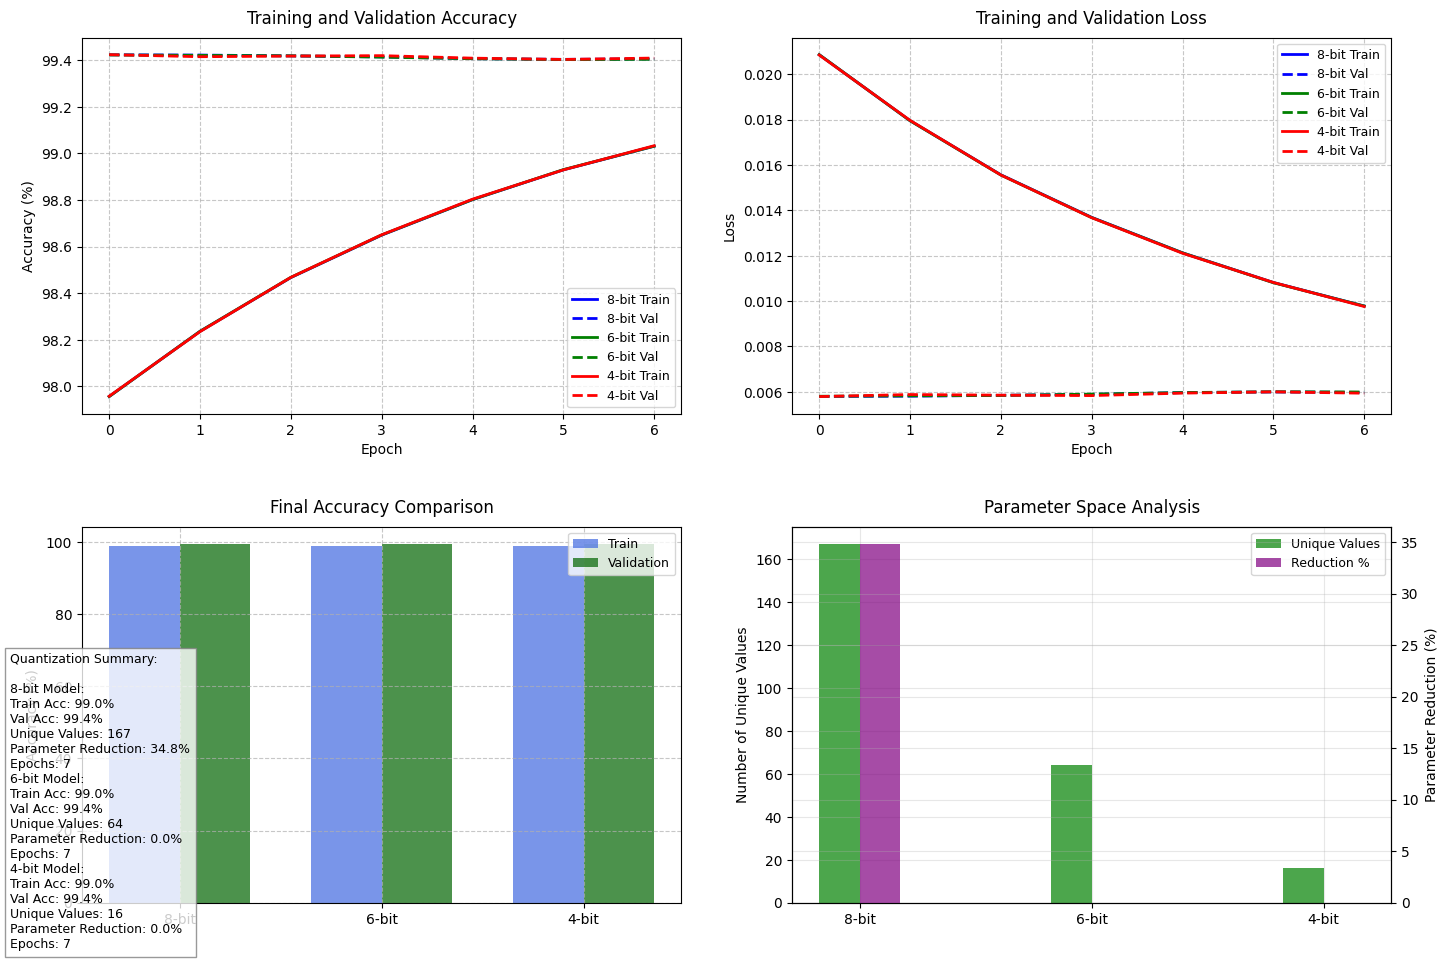


Quantization Comparison:
Bits | Val Acc | Train Acc | Unique Values | Param Reduction
-----------------------------------------------------------------
   8 | 0.9941 | 0.9903 |          167 |           34.8%
   6 | 0.9940 | 0.9903 |           64 |            0.0%
   4 | 0.9941 | 0.9903 |           16 |            0.0%


In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_quantization_metrics(results_dict):
    """Plot performance metrics for different quantization levels"""
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.3
    
    fig = plt.figure()
    
    # Prepare data for plotting
    bits = list(results_dict.keys())
    colors = ['blue', 'green', 'red']
    
    # 1. Training and Validation Accuracy
    ax1 = plt.subplot(2, 2, 1)
    for i, bit in enumerate(bits):
        train_accs = results_dict[bit]['train_accuracies']
        val_accs = results_dict[bit]['val_accuracies']
        epochs = range(len(train_accs))
        
        ax1.plot(epochs, [acc * 100 for acc in train_accs], 
                color=colors[i], linestyle='-', 
                linewidth=2, label=f'{bit}-bit Train')
        ax1.plot(epochs, [acc * 100 for acc in val_accs], 
                color=colors[i], linestyle='--', 
                linewidth=2, label=f'{bit}-bit Val')
    
    ax1.set_xlabel('Epoch', fontsize=10)
    ax1.set_ylabel('Accuracy (%)', fontsize=10)
    ax1.set_title('Training and Validation Accuracy', fontsize=12, pad=10)
    ax1.legend(fontsize=9)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # 2. Training and Validation Loss
    ax2 = plt.subplot(2, 2, 2)
    for i, bit in enumerate(bits):
        train_losses = results_dict[bit]['train_losses']
        val_losses = results_dict[bit]['val_losses']
        epochs = range(len(train_losses))
        
        ax2.plot(epochs, train_losses, 
                color=colors[i], linestyle='-',
                linewidth=2, label=f'{bit}-bit Train')
        ax2.plot(epochs, val_losses, 
                color=colors[i], linestyle='--',
                linewidth=2, label=f'{bit}-bit Val')
    
    ax2.set_xlabel('Epoch', fontsize=10)
    ax2.set_ylabel('Loss', fontsize=10)
    ax2.set_title('Training and Validation Loss', fontsize=12, pad=10)
    ax2.legend(fontsize=9)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # 3. Final Accuracy Comparison
    ax3 = plt.subplot(2, 2, 3)
    x = np.arange(len(bits))
    width = 0.35
    
    train_accs = [results_dict[bit]['train_accuracies'][-1] * 100 for bit in bits]
    val_accs = [results_dict[bit]['val_accuracies'][-1] * 100 for bit in bits]
    
    ax3.bar(x - width/2, train_accs, width, label='Train', 
            color='royalblue', alpha=0.7)
    ax3.bar(x + width/2, val_accs, width, label='Validation', 
            color='darkgreen', alpha=0.7)
    
    ax3.set_xticks(x)
    ax3.set_xticklabels([f'{bit}-bit' for bit in bits])
    ax3.set_ylabel('Accuracy (%)', fontsize=10)
    ax3.set_title('Final Accuracy Comparison', fontsize=12, pad=10)
    ax3.legend(fontsize=9)
    ax3.grid(True, linestyle='--', alpha=0.7)
    
    # 4. Parameter Space Analysis
    ax4 = plt.subplot(2, 2, 4)
    unique_values = [results_dict[bit]['unique_params'][-1] for bit in bits]
    param_reduction = [(2**bit - unique_values[i]) / (2**bit) * 100 
                      for i, bit in enumerate(bits)]
    
    # Create twin axes for dual visualization
    ax4_twin = ax4.twinx()
    
    # Plot bars for unique values
    bars = ax4.bar(x - width/4, unique_values, width/2, 
                   color='green', alpha=0.7, label='Unique Values')
    # Plot bars for parameter reduction
    bars_twin = ax4_twin.bar(x + width/4, param_reduction, width/2, 
                            color='purple', alpha=0.7, label='Reduction %')
    
    ax4.set_xticks(x)
    ax4.set_xticklabels([f'{bit}-bit' for bit in bits])
    ax4.set_ylabel('Number of Unique Values', fontsize=10)
    ax4_twin.set_ylabel('Parameter Reduction (%)', fontsize=10)
    ax4.set_title('Parameter Space Analysis', fontsize=12, pad=10)
    
    # Combine legends
    lines1, labels1 = ax4.get_legend_handles_labels()
    lines2, labels2 = ax4_twin.get_legend_handles_labels()
    ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=9)
    
    plt.tight_layout(pad=3.0)
    
    # Add summary statistics
    summary_text = "Quantization Summary:\n"
    for bit in bits:
        reduction = (2**bit - results_dict[bit]['unique_params'][-1]) / (2**bit) * 100
        summary_text += (
            f"\n{bit}-bit Model:\n"
            f"Train Acc: {results_dict[bit]['train_accuracies'][-1]*100:.1f}%\n"
            f"Val Acc: {results_dict[bit]['val_accuracies'][-1]*100:.1f}%\n"
            f"Unique Values: {results_dict[bit]['unique_params'][-1]}\n"
            f"Parameter Reduction: {reduction:.1f}%\n"
            f"Epochs: {len(results_dict[bit]['train_accuracies'])}"
        )
    
    plt.figtext(0.02, 0.02, summary_text, fontsize=9,
                bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))
    
    return fig

def train_and_visualize(n_epochs=100, batch_size=4, learning_rate=0.002):
    """Train models with different bit depths and create visualization"""
    bit_levels = [8, 6, 4]
    results = {}
    
    for bits in bit_levels:
        print(f"\nTraining {bits}-bit quantized model...")
        try:
            model, accuracy, metrics = train_optimized_model(
                n_epochs=n_epochs,
                batch_size=batch_size,
                learning_rate=learning_rate,
                num_bits=bits
            )
            results[bits] = {
                'accuracy': accuracy,
                'train_accuracies': metrics['train_accuracies'],
                'val_accuracies': metrics['val_accuracies'],
                'train_losses': metrics['train_losses'],
                'val_losses': metrics['val_losses'],
                'unique_params': metrics['unique_params']
            }
        except Exception as e:
            print(f"Error training {bits}-bit model: {str(e)}")
            continue
    
    if not results:
        print("No models were successfully trained.")
        return None
    
    # Create visualization
    try:
        fig = plot_quantization_metrics(results)
        plt.show()
    except Exception as e:
        print(f"Error creating visualization: {str(e)}")
        return results
    
    # Print comparison table
    print("\nQuantization Comparison:")
    print("Bits | Val Acc | Train Acc | Unique Values | Param Reduction")
    print("-" * 65)
    for bits, res in results.items():
        reduction = (2**bits - res['unique_params'][-1]) / (2**bits) * 100
        print(f"{bits:4d} | {res['val_accuracies'][-1]:.4f} | "
              f"{res['train_accuracies'][-1]:.4f} | {res['unique_params'][-1]:12d} | "
              f"{reduction:14.1f}%")
    
    return results

if __name__ == "__main__":
    results = train_and_visualize()